## Abalone Age Prediction

# xIntroduction
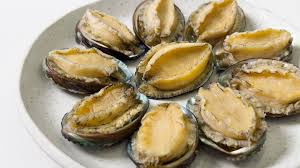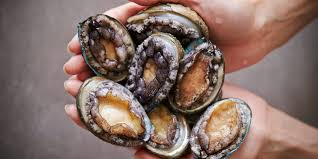

## Objective
Abalone are marine mollusks known as mother-of-pearl shells.They are found in costal water all around the world and play important roles in marine ecosystem. They are economocially significant anf considered as delicacies in various cuisines. But they are facing threat from over fishing, habitat loss and climate change.

Age is a signifcant factor for a abalone for several reasons.
* Economic value: The price and value of abalone generally increases with age. Older abalones tend to be larger and have more meat, making them more desirable in the market1.
* Conservation efforts: Understanding the age structure of abalone populations is crucial for conservation and sustainable management of these species, many of which are endangered or threatened due to overfishing2.
* Biological research: Age data helps researchers study growth rates, population dynamics, and life history traits of abalone species1.
* Aquaculture optimization: For abalone farming, knowing the relationship between age and physical characteristics can help optimize production and harvesting strategies3.
* Environmental indicators: As long-lived marine organisms, abalones can serve as indicators of long-term environmental changes in coastal ecosystems2.
* Fisheries management: Age data is essential for setting sustainable fishing quotas and regulations to prevent overexploitation1.
* Quality assessment: In the culinary world, the age of abalone can be an indicator of its texture and flavor, influencing its use in cuisine.
* Reproductive capacity: Age is related to sexual maturity and reproductive potential, which is important for maintaining wild populations2.
* Shell quality: Older abalones often have thicker, more developed shells, which can be valuable in industries that use abalone shells for decorative purposes.
* Scientific modeling: Age data is crucial for developing accurate growth models and population dynamics simulations for abalone species3.
## Research Questions

*  How accurately can we estimate an abalone's age using its physical characteristics?
* Which physical features are most indicative of an abalone's sex? 


## Dataset Description

* The Dataset is available at UCI ML repository https://archive.ics.uci.edu/dataset/1/abalone
* It Consists of 9 Variables which can be further divided into 1 categorical variable and numerical variable
* There are no missing values in this dataset
* Attributes of this dataset are
  * Sex:Categorical(M,F,I)
    * M = Male
    * F = Female
    * I = Infant
  * Length: Continuous - Longest shell measurement (mm)
  * Diameter: Continuous - Perpendicular to length (mm)
  * Height: Continuous - With meat in shell (mm)
  * Whole weight: Continuous - Whole abalone (grams)
  * Shucked weight: Continuous - Weight of meat (grams)
  * Viscera weight: Continuous - Gut weight (after bleeding) (grams)
  * Shell weight: Continuous - After being dried (grams)
  * Rings: Integer - +1.5 gives the age in years

In [56]:
# !pip install ucimlrepo
# !pip install dython

from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns
from dython import nominal
from dython import nominal
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  root_mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score




In [57]:

# Load the dataset
df = pd.read_csv("abalone.data", header=None)
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
df["age"]=df['Rings']+1.5
df = df.drop('Rings', axis = 1)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [58]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64


<Axes: >

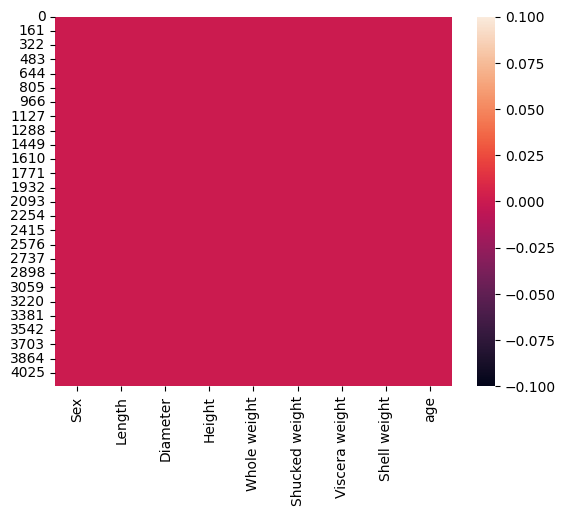

In [59]:
missing_values = df.isnull().sum()
print(missing_values)
sns.heatmap(df.isnull())

There are no missing values in this dataset

In [60]:
# Find duplicate rows
duplicates = df[df.duplicated()]

# Display duplicate rows
print(f"Number of duplicate rows: {duplicates.shape[0]}")
duplicates

Number of duplicate rows: 0


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age


There are no duplicates in the df

Outliers are present in all weight related attributes i.e, Whole weight, Shucked weight, Vistera Weight, Shell Weight. This might be due to biological variation and not due to df entry errors as they correlate with larger shells. So, it is not advisable to eliminate these outliers, instead we can leverage them to understand the full charectaristics of abalone.

In [61]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select the numerical columns for normalization
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print(numerical_columns[:-1])
# Apply the scaler to the numerical columns

df[numerical_columns[:-1]] = scaler.fit_transform(df[numerical_columns[:-1]])

# Display the first few rows of the normalized dataframe
df.head()
# Reverse the transformation for the 'Rings' column to get the original values
# df['age'] = df['age'] * (max - min) + min
df.head()

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,16.5
1,M,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,8.5
2,F,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,10.5
3,M,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,11.5
4,I,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,8.5


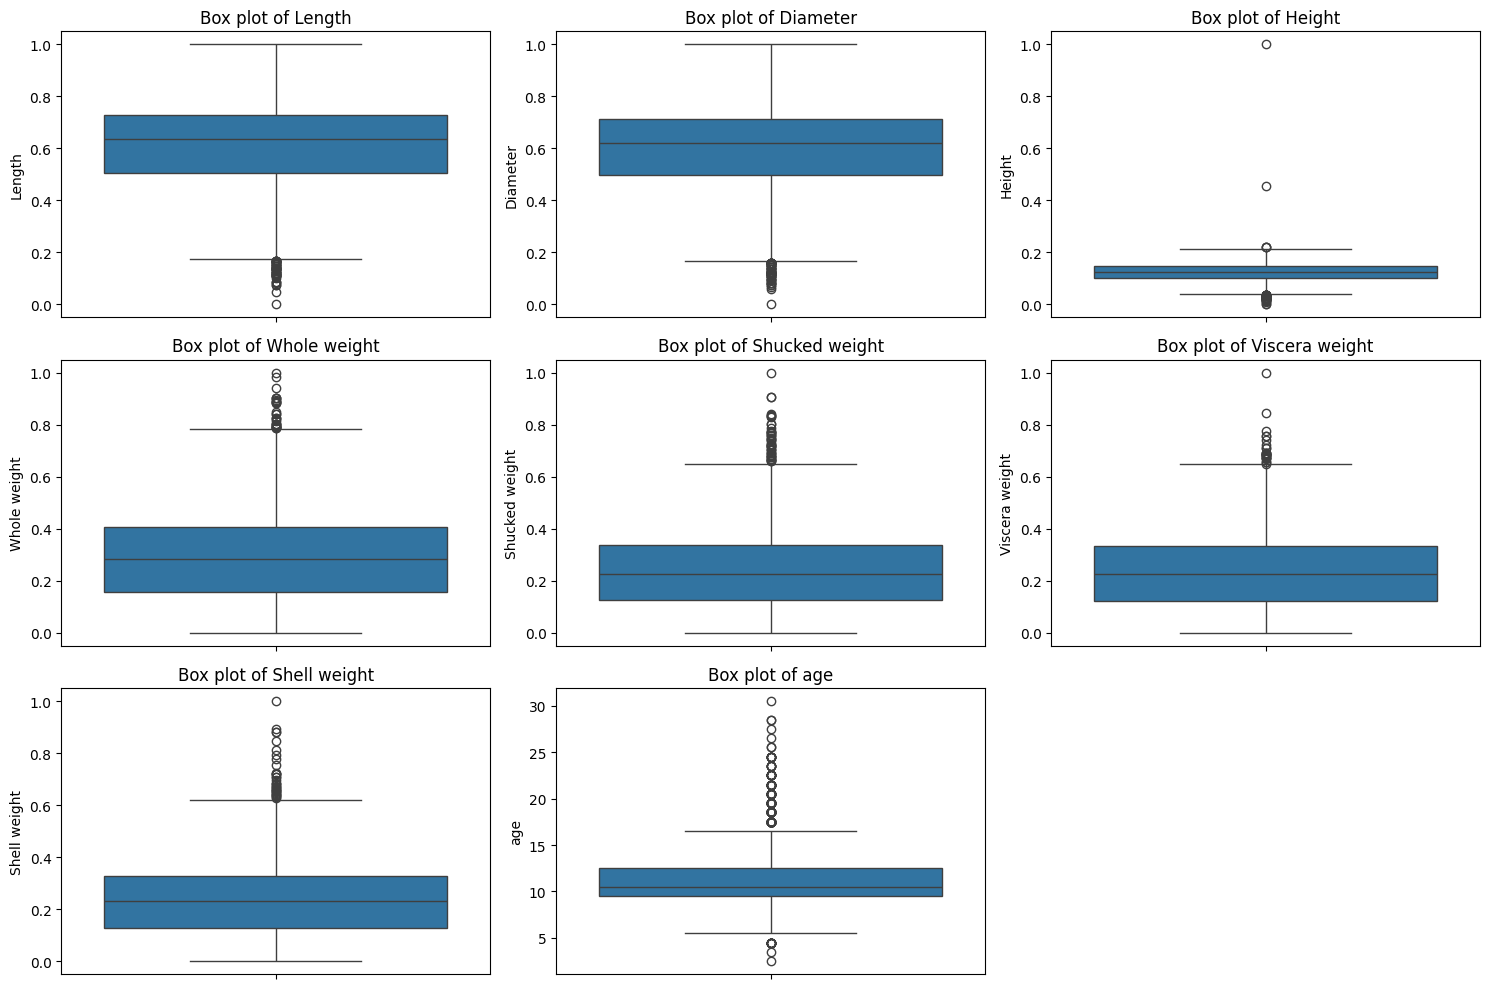

In [62]:
# Plot box plots for each numerical column to check for outliers
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()
max=df['age'].max()
min=df['age'].min()

## Univariate Analysis

In [63]:


data_shape=df.shape
# print(data_shape)
print(f"Number of Observations in the dataset is : {data_shape[0]}, Number of Features in the dataset is : {data_shape[1]}")


Number of Observations in the dataset is : 4177, Number of Features in the dataset is : 9


In [64]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age'],
      dtype='object')

In [65]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.606746,0.593078,0.123466,0.292808,0.241000,0.237121,0.236503,11.433684
std,0.162288,0.166790,0.037015,0.173681,0.149269,0.144324,0.138717,3.224169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000
25%,0.506757,0.495798,0.101770,0.155658,0.124412,0.122449,0.128052,9.500000
50%,0.635135,0.621849,0.123894,0.282451,0.225286,0.224490,0.231689,10.500000
75%,0.729730,0.714286,0.146018,0.407650,0.336920,0.332456,0.326358,12.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.500000


### Histograms of Attributes

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Whole weight'}>],
       [<Axes: title={'center': 'Shucked weight'}>,
        <Axes: title={'center': 'Viscera weight'}>,
        <Axes: title={'center': 'Shell weight'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

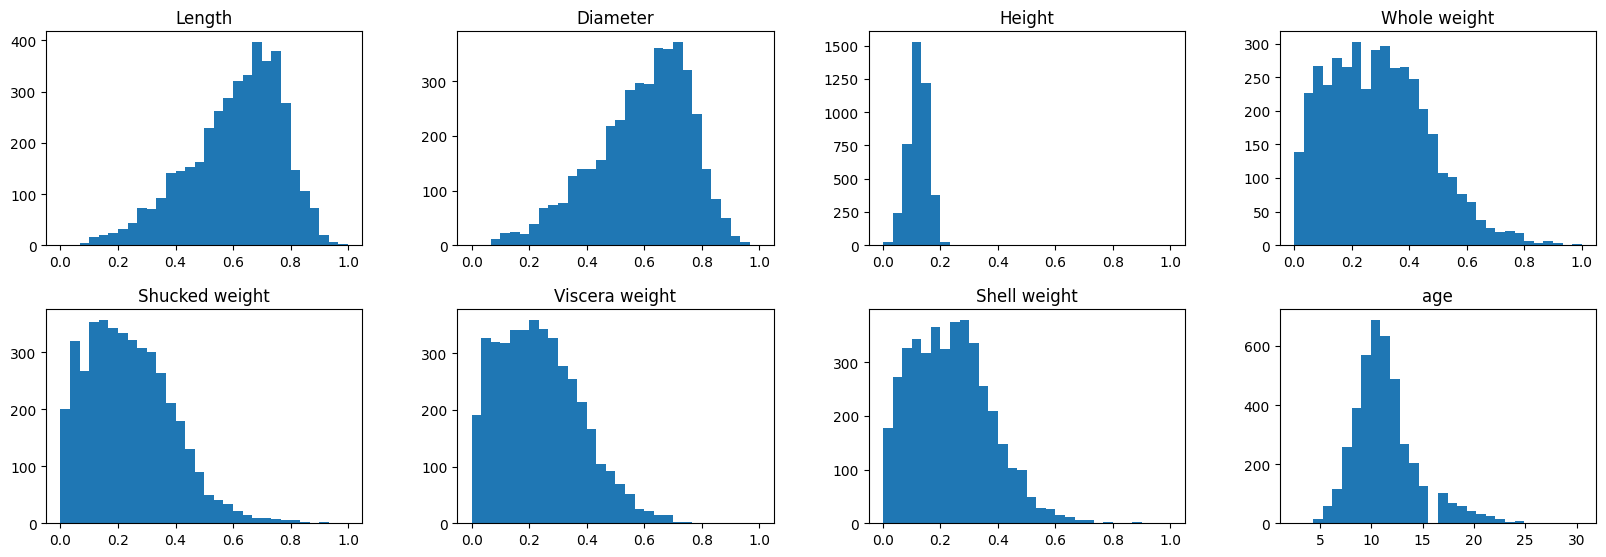

In [66]:
df.hist(figsize=(20,10), grid=False, layout=(3,4), bins = 30)

In [67]:
from scipy.stats import skew

numerical_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(include=[object]).columns
skew_values = skew(df[numerical_features], nan_policy='omit')
dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis=1)
dummy.sort_values(by='Skewness degree', ascending=False)

,Features,Skewness degree
2,Height,3.127694
7,age,1.113702
4,Shucked weight,0.718840
6,Shell weight,0.620704
5,Viscera weight,0.591640
3,Whole weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643


* Skewness should be 0 for normally distributed data.
* Height is highly right skewed
* Length is highly left skewed


Let's see how the data is distributed with respect to 'Sex' attribute

<Axes: xlabel='Sex', ylabel='count'>

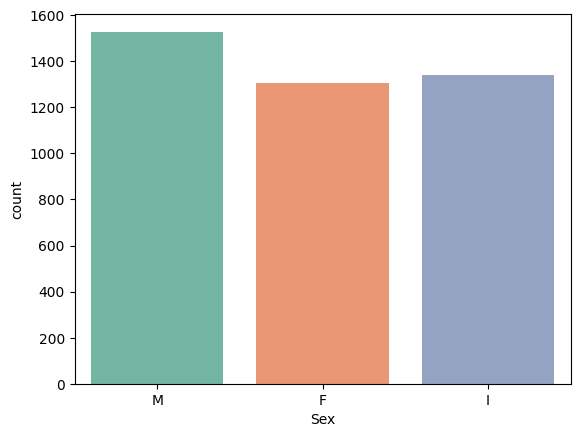

In [68]:
sns.countplot(x='Sex',data=df,palette="Set2")

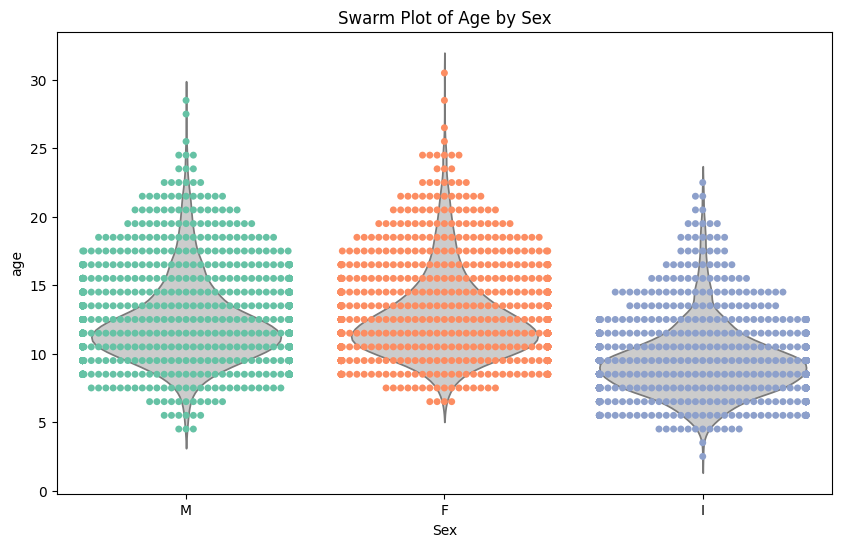

In [69]:
import warnings

warnings.filterwarnings('ignore')

plt.figure(figsize=(10, 6))
sns.swarmplot(x='Sex', y='age', data=df, palette="Set2")
sns.violinplot(x='Sex', y='age', data=df, inner=None, color=".8")
plt.title('Swarm Plot of Age by Sex')
plt.show()

* Male: Majority of Age lies between 7.5 to 19 years
* Female: Majority of Age lies between 8 to 19 years
* Infant: Majority of Age lies between 6 to 10 years

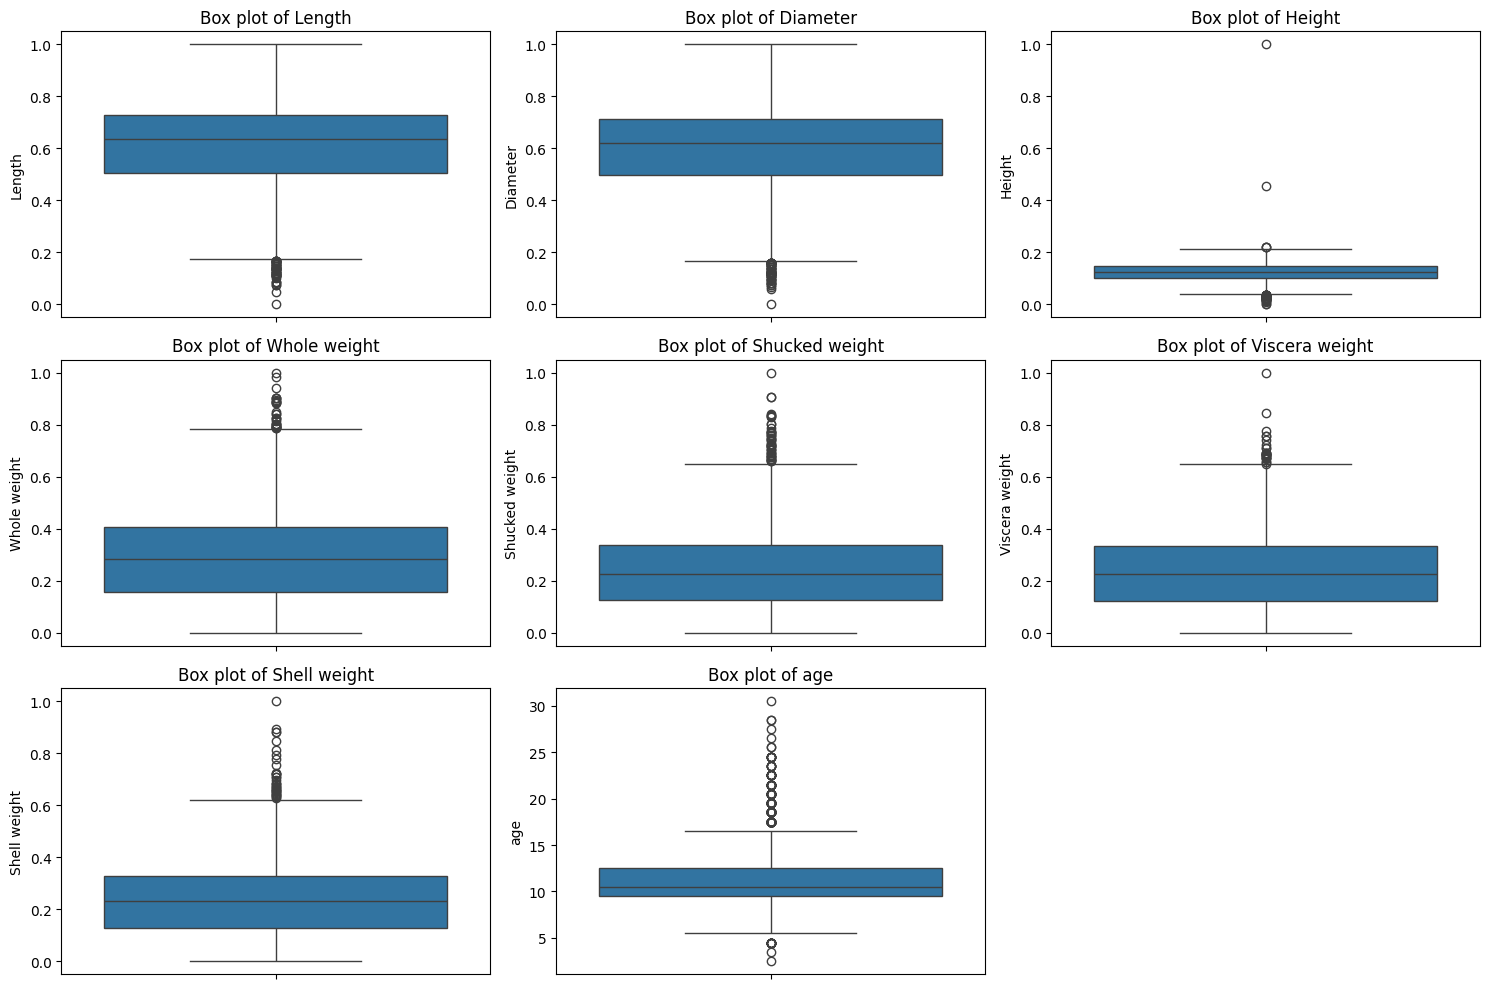

In [70]:
# Plot box plots for each numerical column to check for outliers
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()
max=df['age'].max()
min=df['age'].min()

* Age is most linearly proportional to Shell weight, followed by Diameter and length of the shell
* Whole weight is the attribute which is linealry proprotional to all the attributes except age, sex
* Age is least correlated with Shucked weight of the shell

## Bivariate Analysis

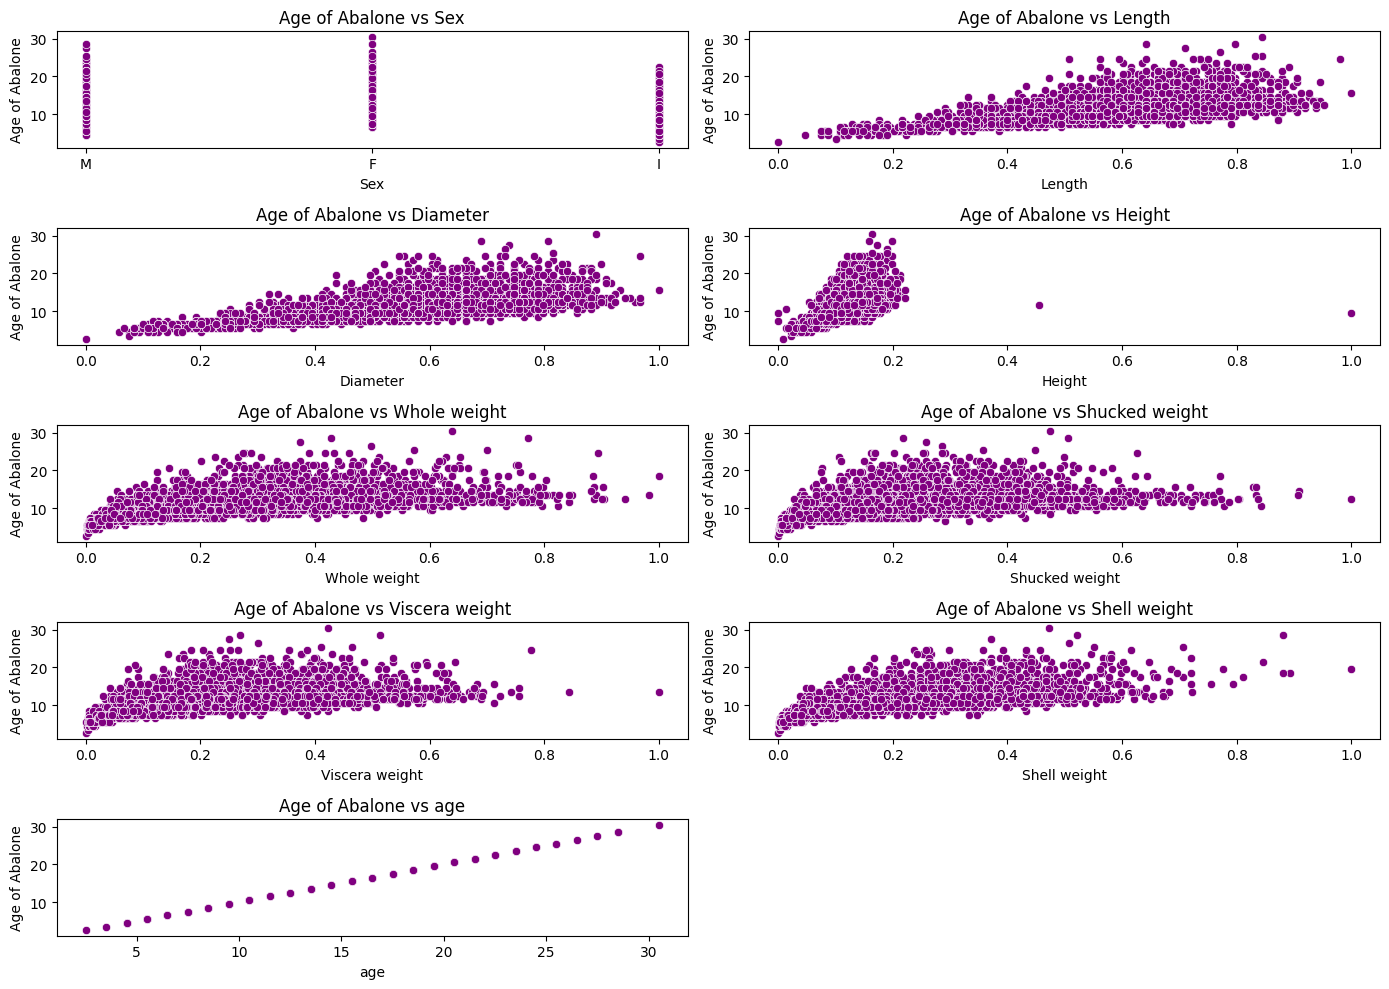

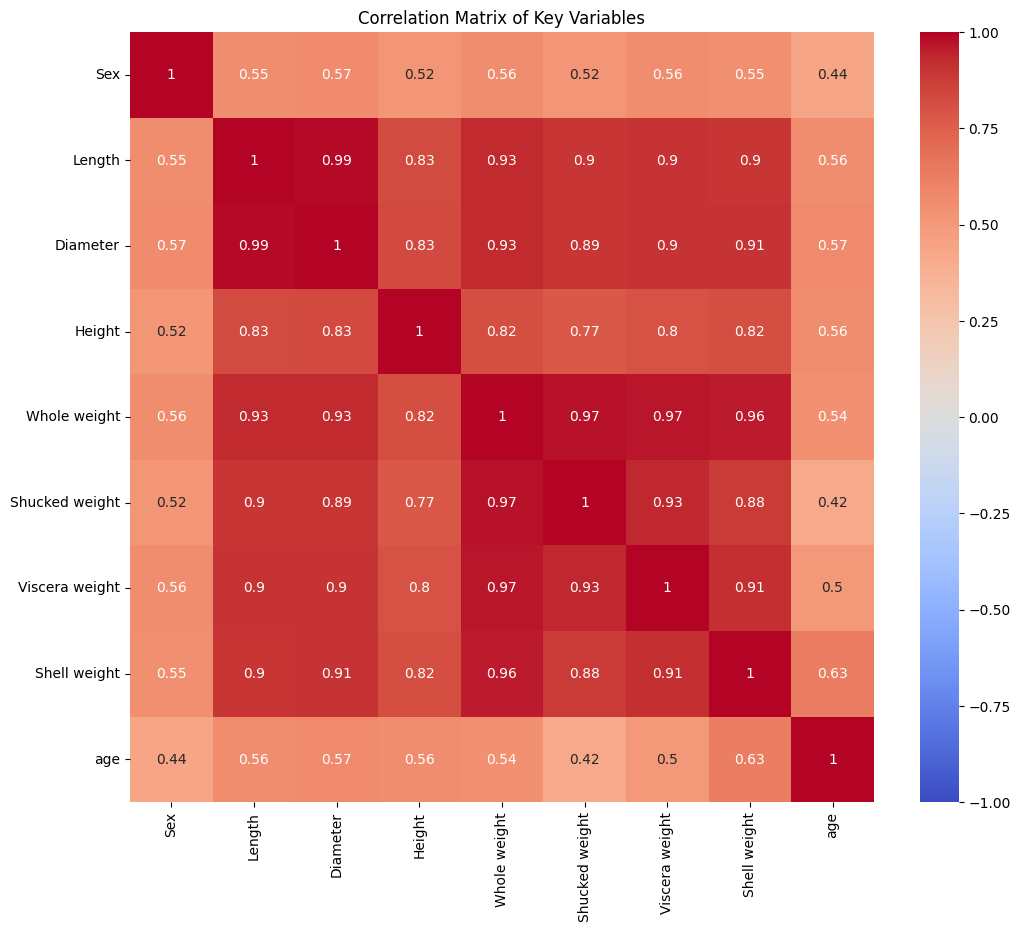

In [71]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(df[1:], 1):
    plt.subplot(5, 2, i)
    sns.scatterplot(x=df[col], y=df['age'], color="purple")
    plt.xlabel(col)
    plt.ylabel('Age of Abalone')
    plt.title(f'Age of Abalone vs {col}')
plt.tight_layout()
plt.show()

associations = nominal.associations(df, nominal_columns='auto', plot=False)
plt.figure(figsize=(12, 10))
sns.heatmap(associations['corr'], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Key Variables')
plt.show()

## Multivariate anlysis

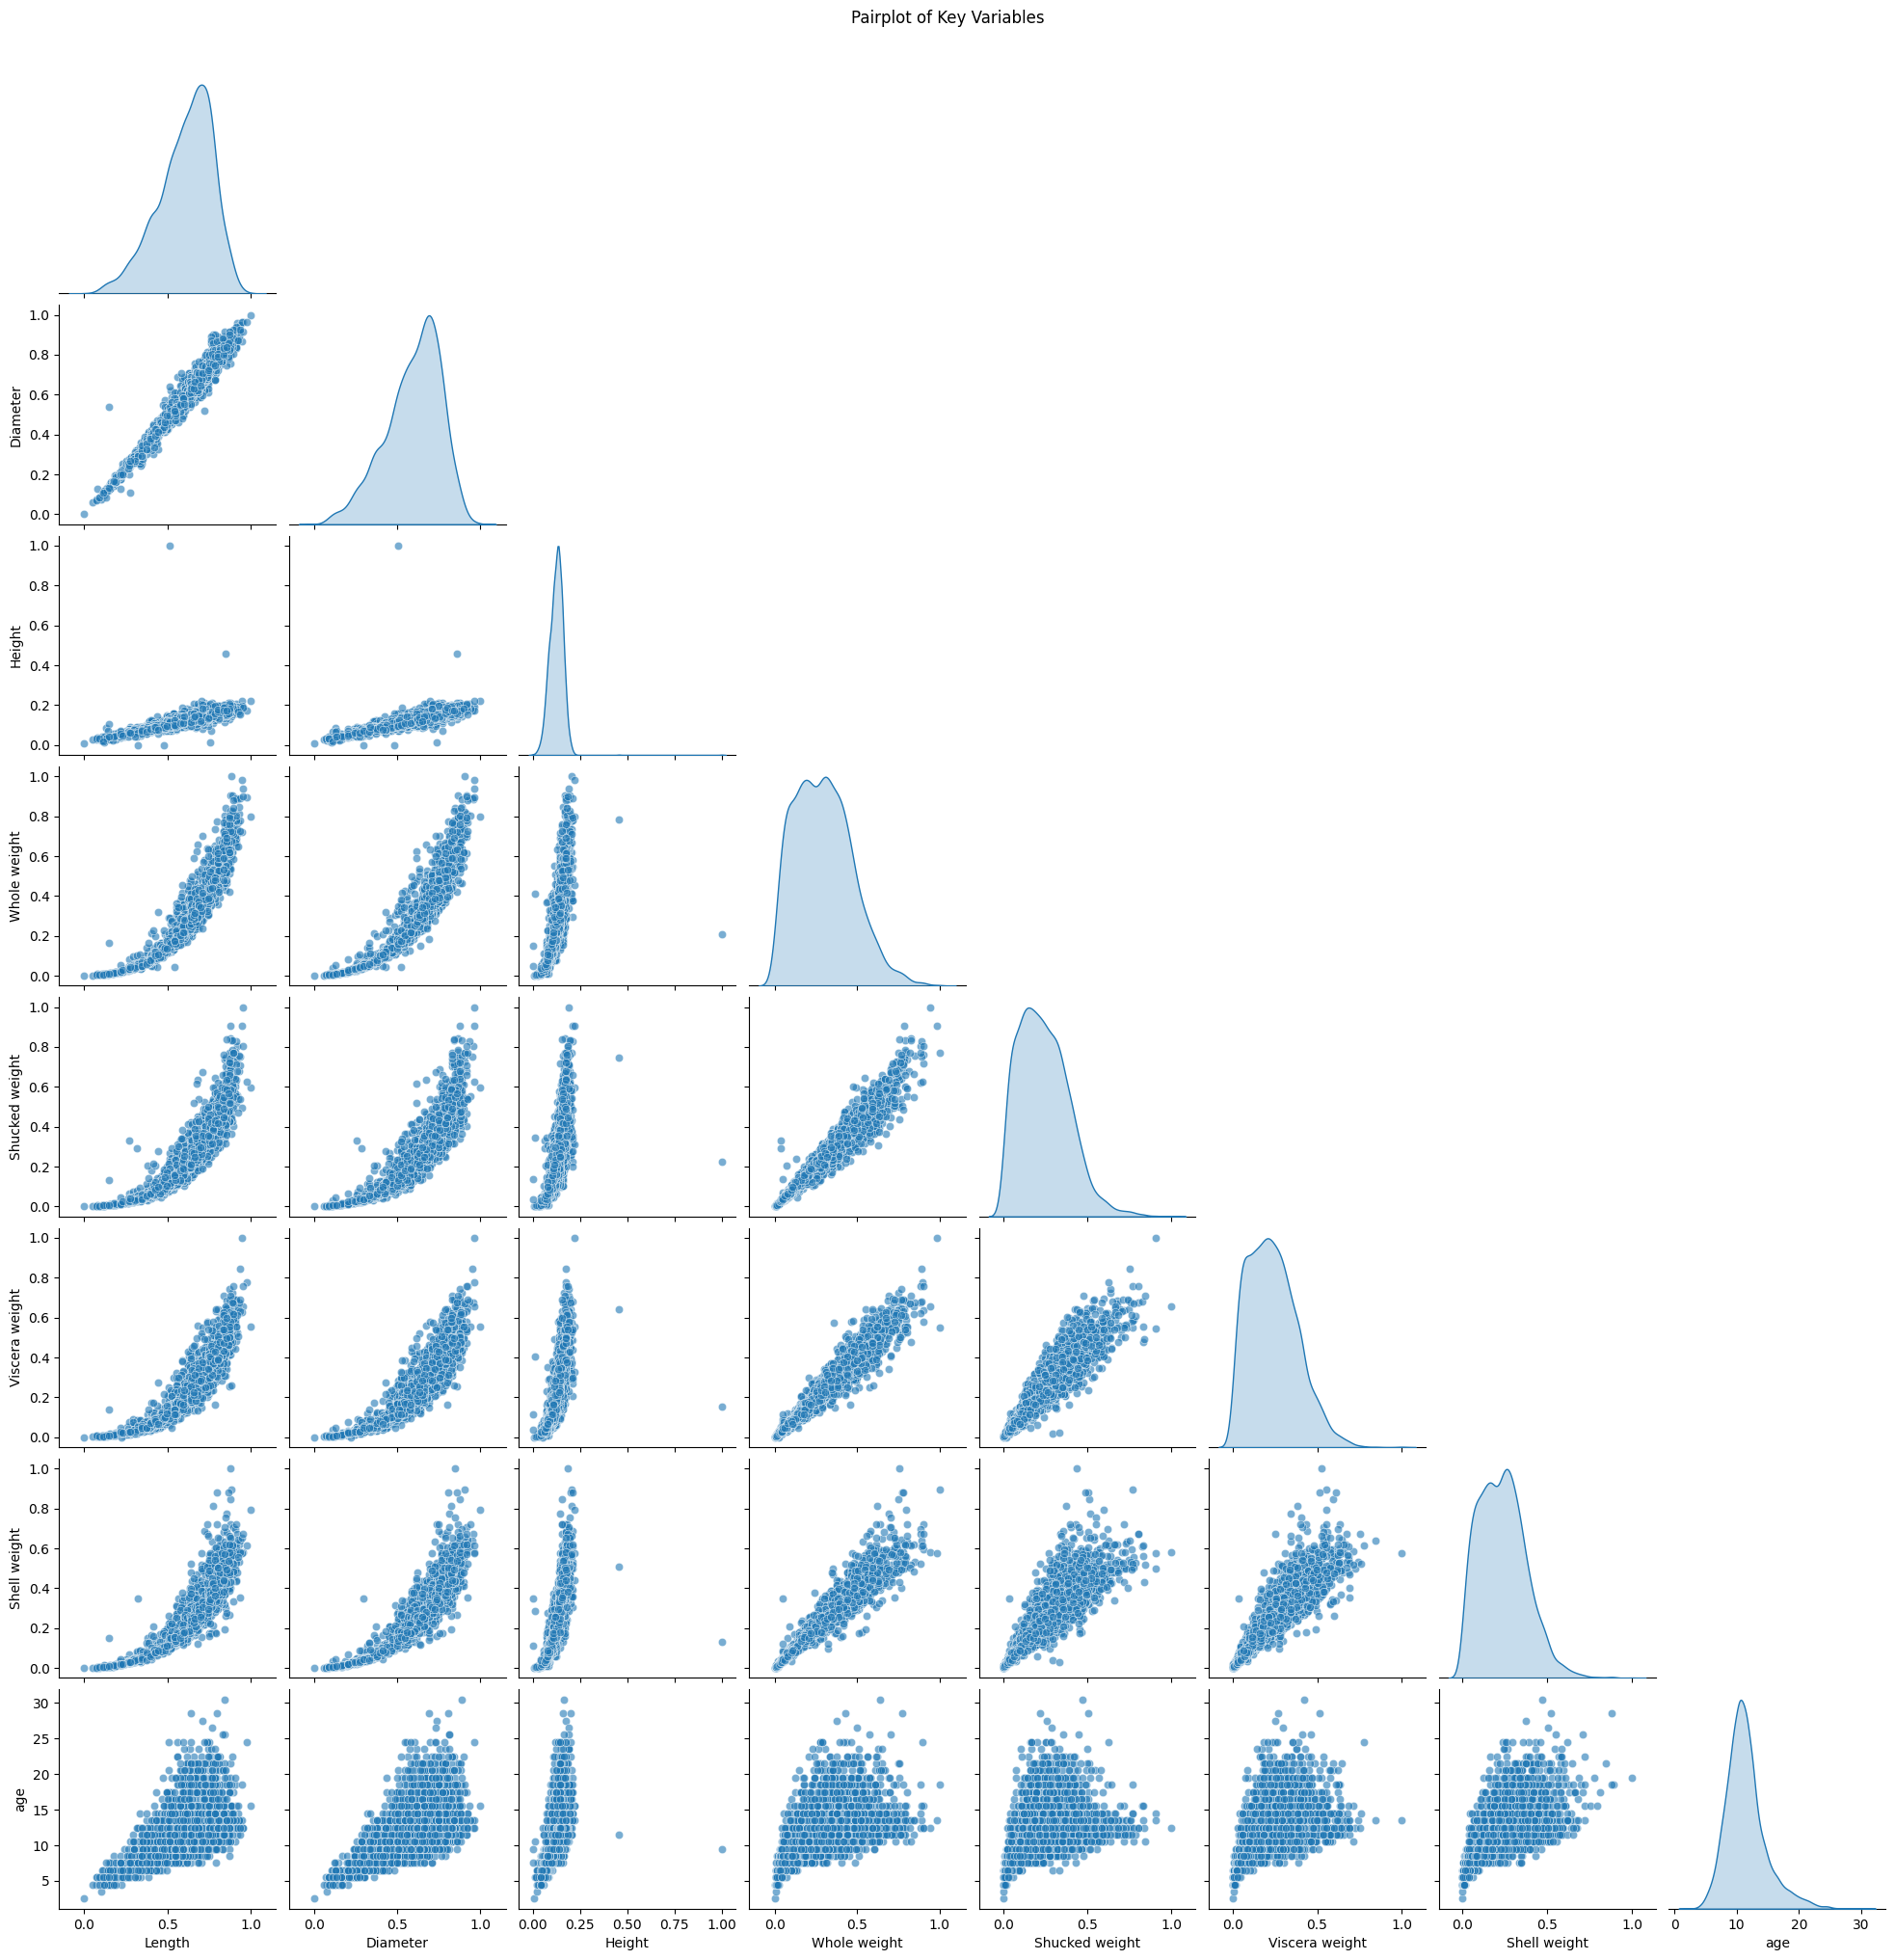

In [72]:
pairplot = sns.pairplot(df[numerical_columns], corner=True, diag_kind='kde', plot_kws={'alpha':0.6})
pairplot.fig.suptitle('Pairplot of Key Variables', y=1.02)  # y=1.02 to adjust the title position
plt.show()

<Figure size 1200x1000 with 0 Axes>

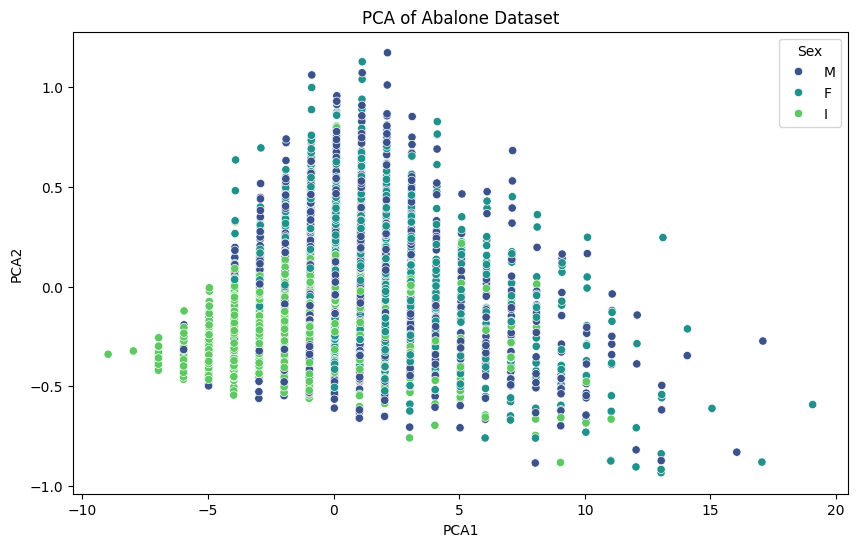

In [73]:
from sklearn.decomposition import PCA

# Heatmap of correlations
plt.figure(figsize=(12, 10))

# Add PCA results to the dataframe

# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(df[numerical_features])
pca_result = PCA(n_components=2).fit_transform(df[numerical_columns])
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Plot PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Sex', data=df, palette='viridis')
plt.title('PCA of Abalone Dataset')
plt.show()

## Simple Linear Regression

R²: 0.4008530955550855
RMSE: 2.546741268515867


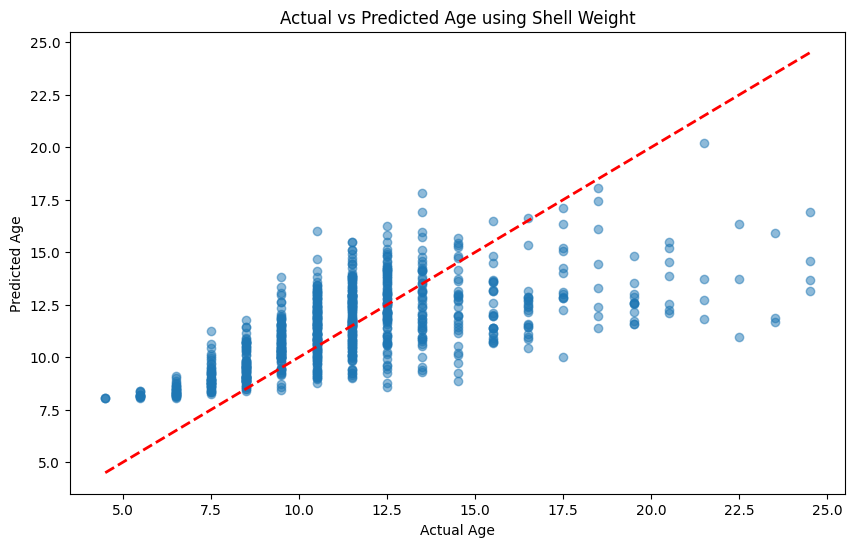

In [74]:


# Select predictor and target variable
X = df[['Shell weight']]  # Predictor variable

# I selected shell weight as predicted variable because it has the highest correlation with age
y = df['age']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_simple_pred = model.predict(X_test)

# Evaluate the model performance
r2_simple = r2_score(y_test, y_simple_pred)
rmse_simple = mean_squared_error(y_test, y_simple_pred, squared=False)

print(f'R²: {r2_simple}')
print(f'RMSE: {rmse_simple}')
# Visualize the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_simple_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual vs Predicted Age using Shell Weight')
plt.show()

## Multiple Linear Regression

R²: 0.5329844757724522
RMSE: 2.2484530558362525
                Coefficient
Length            -1.125617
Diameter           8.020694
Height            12.881446
Whole weight      25.847688
Shucked weight   -30.602767
Viscera weight    -6.723452
Shell weight       8.671871


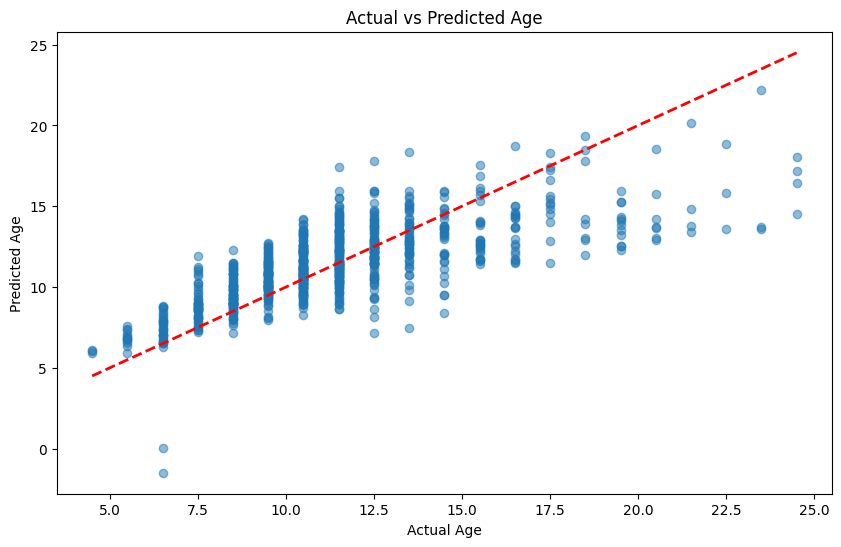

In [75]:
# Select multiple predictor variables
X = df[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']]  # Predictor variables
y = df['age']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_multi_pred = model.predict(X_test)

# Evaluate the model performance
r2_multiple = r2_score(y_test, y_multi_pred)
rmse_multiple = mean_squared_error(y_test, y_multi_pred, squared=False)

print(f'R²: {r2_multiple}')
print(f'RMSE: {rmse_multiple}')

# Analyze the significance of each predictor variable
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)
# Visualize the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_multi_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual vs Predicted Age')
plt.show()

## Polynomial Linear Regression

Polynomial Regression (degree=2) R²: 0.5366701786948961
Polynomial Regression (degree=2) RMSE: 2.239563045774421
Linear Regression R²: 0.5366701786948961
Linear Regression RMSE: 2.239563045774421


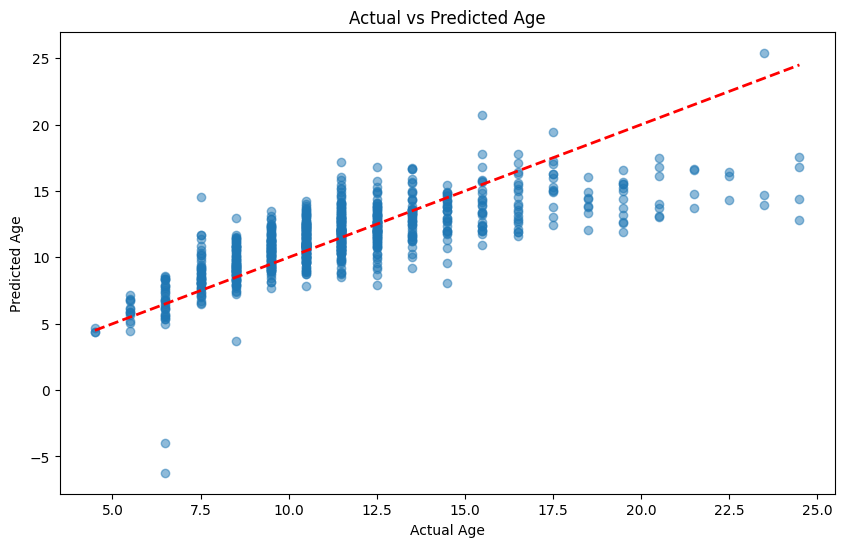

In [76]:
degree = 2

poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)

r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = mean_squared_error(y_test, y_pred_poly, squared=False)

print(f'Polynomial Regression (degree={degree}) R²: {r2_poly}')
print(f'Polynomial Regression (degree={degree}) RMSE: {rmse_poly}')

print(f'Linear Regression R²: {r2_poly}')
print(f'Linear Regression RMSE: {rmse_poly}')
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual vs Predicted Age')
plt.show()

##  Logistic Regression


Accuracy: 0.8110047846889952
Precision: 0.8375634517766497
Recall: 0.8886894075403949
ROC-AUC: 0.8933933064355257


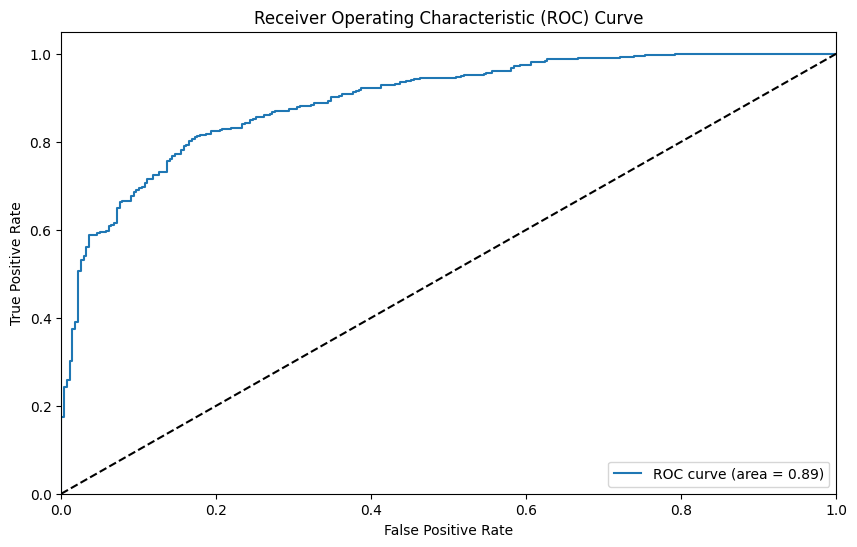

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

# Convert the target variable 'age' into a binary classification problem
# For example, classify abalones as young (age <= 10) or old (age > 10)
df['age_binary'] = (df['age'] > 10).astype(int)

# Select predictor variables
X = df[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']]
y = df['age_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y__logi_pred = logistic_model.predict(X_test)
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]

# Evaluate the model performance
accuracy = accuracy_score(y_test, y__logi_pred)
precision = precision_score(y_test, y__logi_pred)
recall = recall_score(y_test, y__logi_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'ROC-AUC: {roc_auc}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Lasso Regression

LASSO Regression R²: 0.3430355050549142
LASSO Regression RMSE: 2.666791827318772


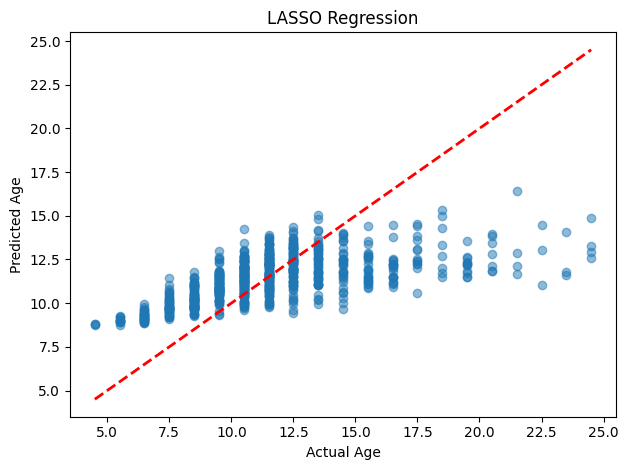

In [78]:


lasso = Lasso(alpha=0.1)
y = df['age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

# Evaluate the models
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)

print(f'LASSO Regression R²: {r2_lasso}')
print(f'LASSO Regression RMSE: {rmse_lasso}')


# Visualize the actual vs predicted values for each model
# plt.figure(figsize=(15, 5))

# plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lasso, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('LASSO Regression')





plt.tight_layout()
plt.show()

## Ridge Regression

Ridge Regression R²: 0.5207421150642162
Ridge Regression RMSE: 2.2777329234173878


Text(0.5, 1.0, 'Ridge Regression')

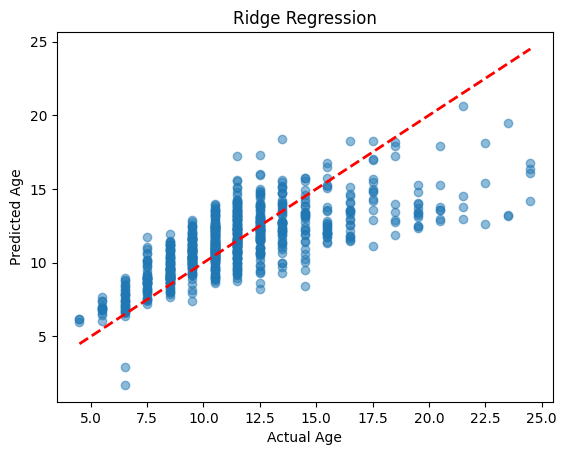

In [79]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)


r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)


print(f'Ridge Regression R²: {r2_ridge}')
print(f'Ridge Regression RMSE: {rmse_ridge}')

# plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Ridge Regression')

## Elastic Net Regression

Elastic Net Regression R²: 0.28367741386571554
Elastic Net Regression RMSE: 2.784662000186132


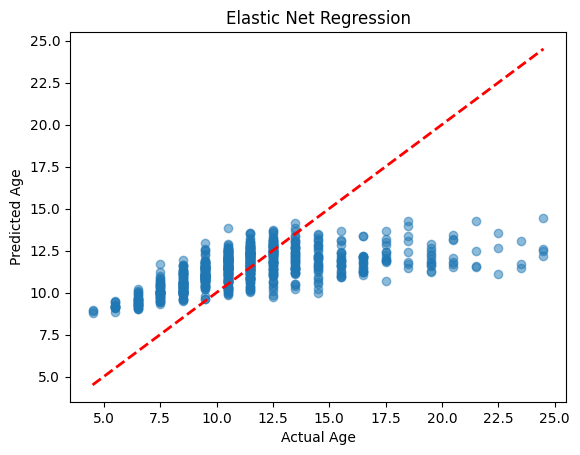

In [80]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
y_pred_elastic_net = elastic_net.predict(X_test)

r2_elastic_net = r2_score(y_test, y_pred_elastic_net)
rmse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net, squared=False)

print(f'Elastic Net Regression R²: {r2_elastic_net}')
print(f'Elastic Net Regression RMSE: {rmse_elastic_net}')

plt.scatter(y_test, y_pred_elastic_net, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Elastic Net Regression')
plt.show()


## Quantile Regression

                         QuantReg Regression Results                          
Dep. Variable:                    age   Pseudo R-squared:               0.3368
Model:                       QuantReg   Bandwidth:                      0.5458
Method:                 Least Squares   Sparsity:                        3.962
Date:                Tue, 26 Nov 2024   No. Observations:                 3341
Time:                        01:42:49   Df Residuals:                     3333
                                        Df Model:                            7
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.5099      0.223     20.220      0.000       4.073       4.947
Length            -0.0409      1.387     -0.030      0.976      -2.761       2.679
Diameter           5.5800      1.359      4.105      0.000       2.915       8.245
Height            21.3917      1

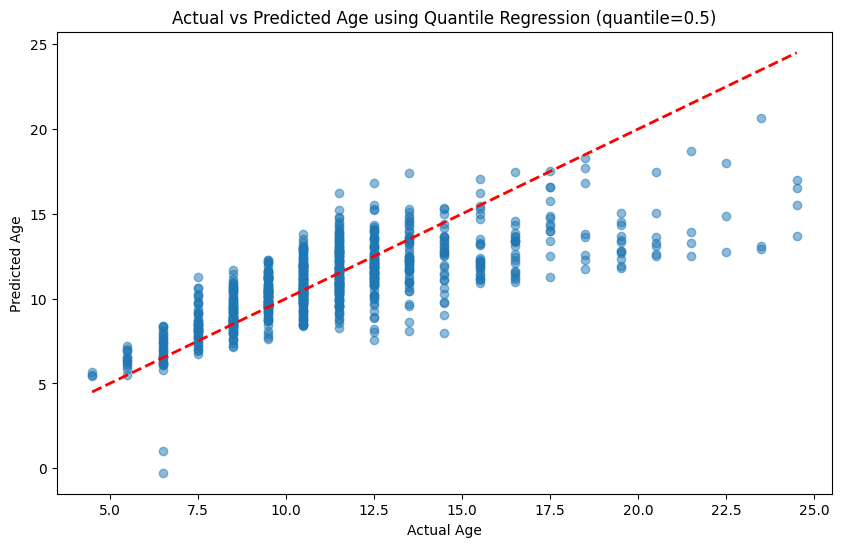

In [81]:
import statsmodels.api as sm

# Define the quantile
quantile = 0.5  # Median regression

# Add a constant term to the predictor variables
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fit the quantile regression model
quant_reg = sm.QuantReg(y_train, X_train_const)
quant_reg_model = quant_reg.fit(q=quantile)

# Make predictions on the test set
y_pred_quantile = quant_reg_model.predict(X_test_const)

# Evaluate the model performance
r2_quantile = r2_score(y_test, y_pred_quantile)
rmse_quantile = mean_squared_error(y_test, y_pred_quantile, squared=False)
print(quant_reg_model.summary())
print(f'Quantile Regression (quantile={quantile}) R²: {r2_quantile}')
print(f'Quantile Regression (quantile={quantile}) RMSE: {rmse_quantile}')

# Visualize the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_quantile, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title(f'Actual vs Predicted Age using Quantile Regression (quantile={quantile})')
plt.show()

## Partial Least Square Regression

PLS Regression R²: 0.49488915798823385
PLS Regression RMSE: 2.338360742286316


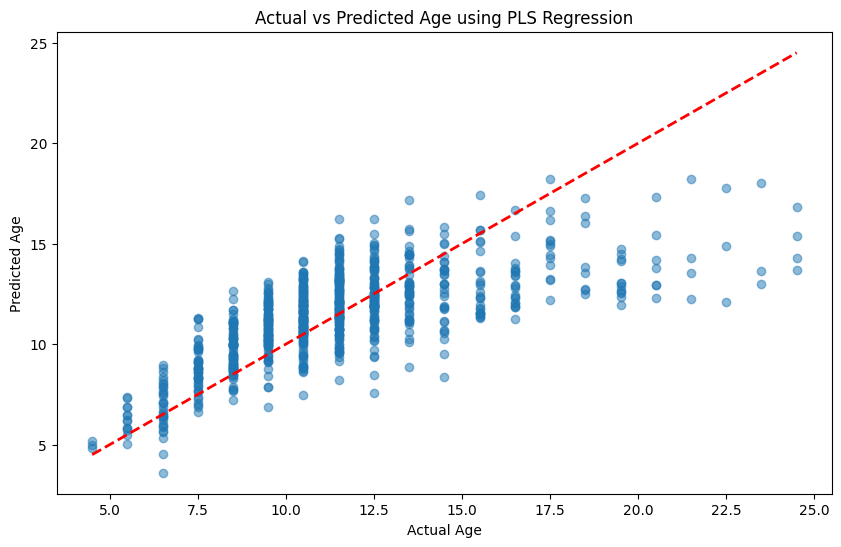

In [82]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the PLS regression model
pls = PLSRegression(n_components=2)

# Fit the model to the training data
pls.fit(X_train, y_train)

# Make predictions on the test set
y_pred_pls = pls.predict(X_test)

# Evaluate the model performance
r2_pls = r2_score(y_test, y_pred_pls)
rmse_pls = mean_squared_error(y_test, y_pred_pls, squared=False)

print(f'PLS Regression R²: {r2_pls}')
print(f'PLS Regression RMSE: {rmse_pls}')

# Visualize the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_pls, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual vs Predicted Age using PLS Regression')
plt.show()

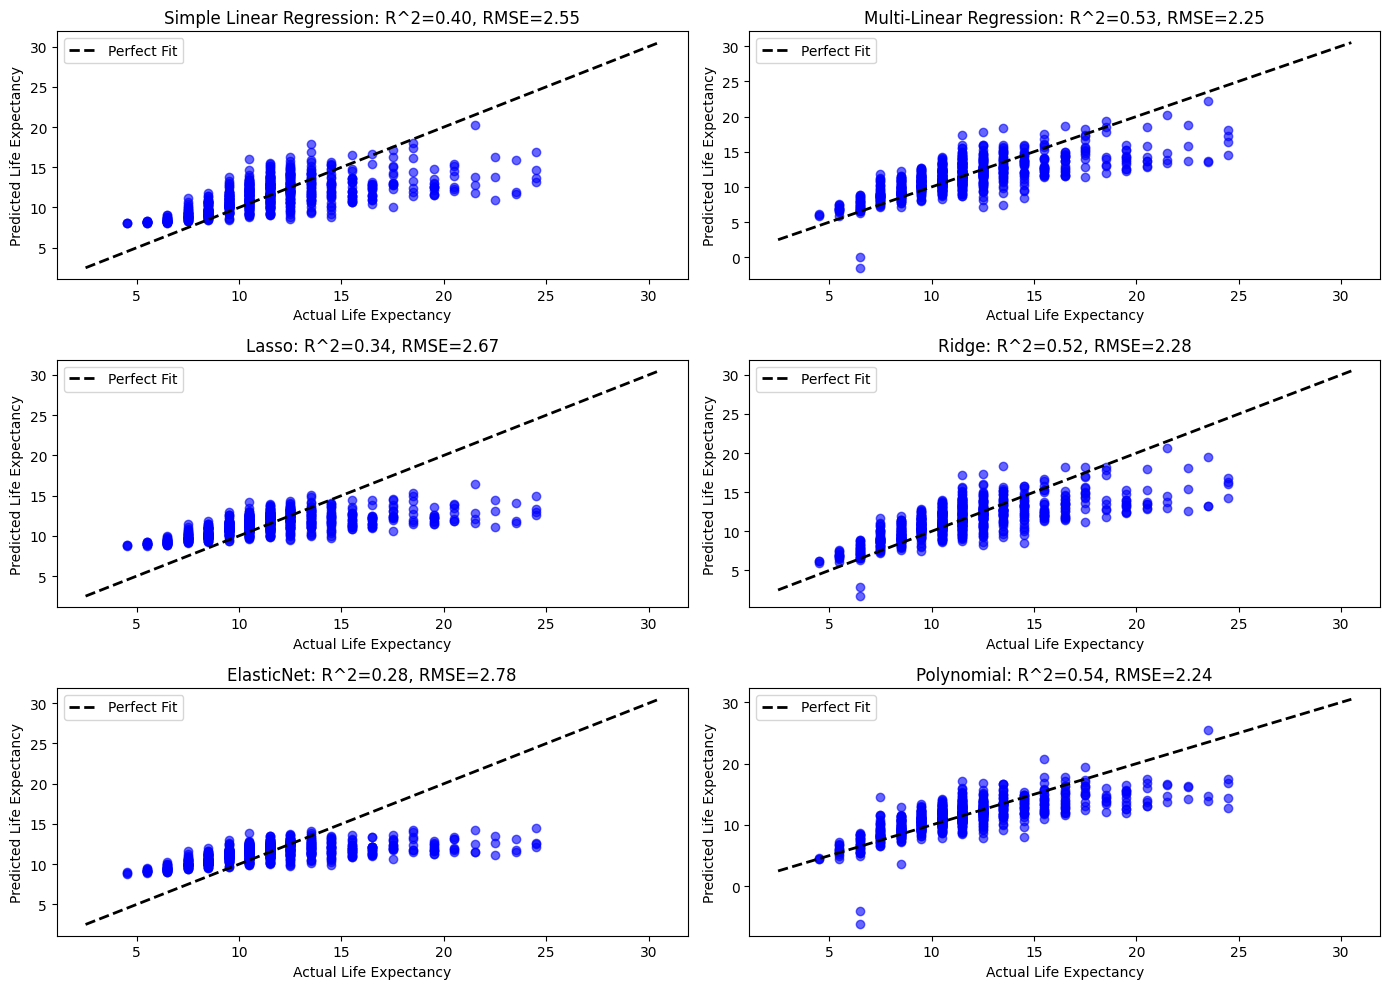

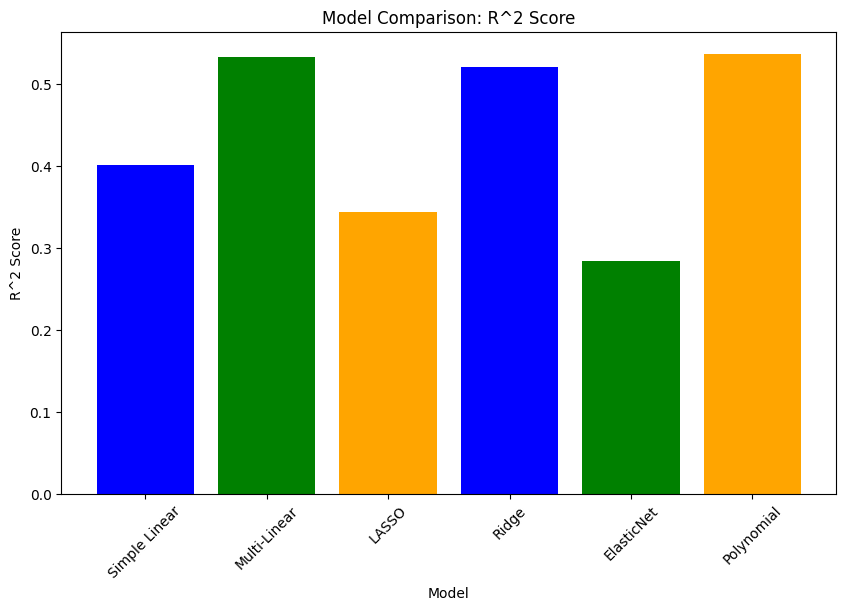

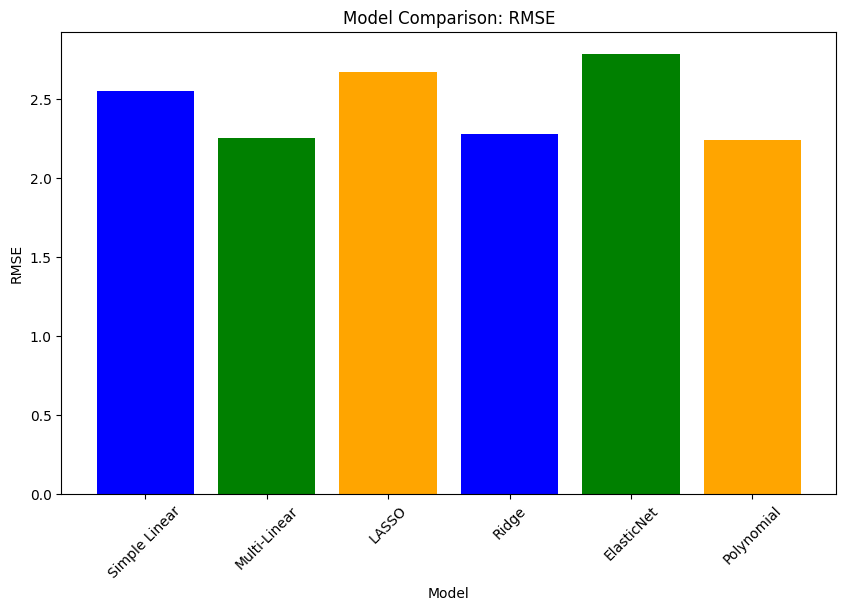

In [83]:
# Plotting actual vs. predicted for comparison
models = ['Simple Linear Regression', 'Multi-Linear Regression', 'Lasso', 'Ridge', 'ElasticNet', 'Polynomial']
predictions = [y_simple_pred, y_multi_pred, y_pred_lasso, y_pred_ridge, y_pred_elastic_net, y_pred_poly]
r2_scores = [r2_simple, r2_multiple, r2_lasso, r2_ridge, r2_elastic_net, r2_poly]
rmse_scores = [rmse_simple, rmse_multiple, rmse_lasso, rmse_ridge, rmse_elastic_net, rmse_poly]

plt.figure(figsize=(14, 10))
for i, (pred, model) in enumerate(zip(predictions, models), 1):
    plt.subplot(3, 2, i)
    plt.scatter(y_test, pred, color='blue', alpha=0.6)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label="Perfect Fit")
    plt.xlabel('Actual Life Expectancy')
    plt.ylabel('Predicted Life Expectancy')
    plt.title(f'{model}: R^2={r2_scores[i-1]:.2f}, RMSE={rmse_scores[i-1]:.2f}')
    plt.legend()

plt.tight_layout()
plt.show()

# Bar plot for R^2 Score comparison

results = pd.DataFrame({
    'Model': ['Simple Linear', 'Multi-Linear', 
              'LASSO', 'Ridge', 'ElasticNet', 
              'Polynomial'],
    'RMSE': [rmse_simple, rmse_multiple, rmse_lasso, rmse_ridge, rmse_elastic_net, rmse_poly],
    'R^2 Score': [r2_simple, r2_multiple, r2_lasso, r2_ridge, r2_elastic_net, r2_poly]
})
plt.figure(figsize=(10, 6))
plt.bar(results['Model'], results['R^2 Score'], color=['blue', 'green', 'orange'])
plt.title('Model Comparison: R^2 Score')
plt.ylabel('R^2 Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(10, 6))
plt.bar(results['Model'], results['RMSE'], color=['blue', 'green', 'orange'])
plt.title('Model Comparison: RMSE')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()


### Results and Interpretation

#### Summary of Findings
* The **Polynomial Regression** model performed best with an R² score of ~0.54, indicating it captured more complex relationships in the data than other models
* **Ridge Regression** and Multi-Linear Regression showed similar performance with R² scores around 0.52
* **Simple Linear Regression** achieved an R² of ~0.40, suggesting linear relationships alone are insufficient
* **LASSO** and **Elastic Net** had lower performance with R² scores of ~0.34 and ~0.28 respectively
#### Key Insights
* The higher performance of polynomial regression suggests there are **non-linear relationships** between physical characteristics and abalone age
* **Ridge Regression's** strong performance indicates some features may be correlated, and regularization helps manage multicollinearity
* **LASSO** and **Elastic Net's** lower scores suggest feature selection alone does not improve predictions significantly
* The relatively low R² scores across all models (~0.54 max) indicates predicting abalone age from physical characteristics remains challenging

#### Limitations
* None of the models achieved very high accuracy, suggesting physical measurements alone may be insufficient for precise age prediction
* The models assume relationships between variables are static across all age ranges
* Additional feature engineering or more complex modeling approaches may be needed
* External factors not captured in the physical measurements likely influence age determination

## References

1. https://archive.ics.uci.edu/dataset/1/abalone
2. https://matplotlib.org/stable/plot_types/index.html
3. https://alfasoft.com/blog/products/statistics-and-data-analysis/quantile-regression-a-flexible-alternative-to-linear-regression/#:~:text=Quantile%20regression%20estimates%20conditional%20quantiles,%2C%20and%20time%2Dvarying%20coefficients.
4. https://personal.utdallas.edu/~herve/Abdi-PLS-pretty.pdf
